# MNIST Random Forest Classification
We compute a patch based RF approach to classify the MNIST database. This script plots the MNIST data to be used and applied PCA to view the features found.

First, import the relevant libraries and functions.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA
import numpy as np

Load the MNIST dataset and randomly permute it. Note that older versions of scikit-learn have issues with JSON errors. Had to use cache=False in fetch_openml(), see [issue 382](https://github.com/skorch-dev/skorch/issues/382).

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255. #norm grayscale values
print(X.shape)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], 28, 28))
print(X.shape)

train_samples = 50000
test_samples = 10000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=test_samples)

(70000, 784)
(70000, 28, 28)


Plot the MNIST images

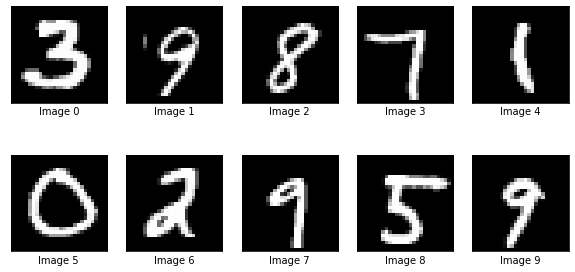

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(X_train[i], interpolation='nearest', cmap=plt.cm.gray)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Image %i' % i)

plt.show()

Extract patches from each image, apply PCA to reduce the information in the patches as eigen-patches per training image.

In [4]:
#extract patches and apply PCA
index = 0
patch_size = (13, 13)
n_components = 10
#precision = 0.95
print(X_train[index].shape)
patches = image.extract_patches_2d(X_train[index], patch_size)
print('Patches shape: {}'.format(patches.shape))
patches = patches.reshape((patches.shape[0], patch_size[0]*patch_size[1]))
print('Patches shape: {}'.format(patches.shape))
pca = PCA(n_components=n_components).fit(patches)
eigenpatches = pca.components_.reshape((n_components, patch_size[0], patch_size[1]))
print(pca.components_.shape)
print(eigenpatches.shape)

(28, 28)
Patches shape: (256, 13, 13)
Patches shape: (256, 169)
(10, 169)
(10, 13, 13)


Plot the resulting eigen-patches

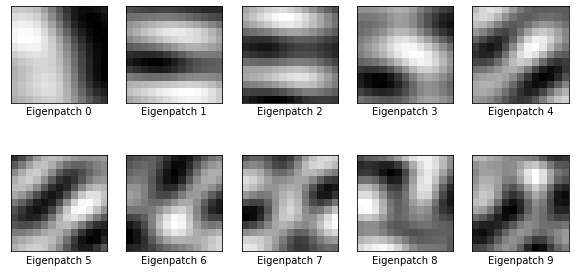

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(eigenpatches[i], interpolation='nearest', cmap=plt.cm.gray)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Eigenpatch %i' % i)

plt.show()